In [6]:
import pandas as pd
import requests

In [7]:
# create request header to call SEC API
headers = {'User-Agent': "jinhuang922@address.com"}
cik_dict = {"AAPL": "320193", "MSFT": "789019", "GOOGL": "1652044", "AMZN": "1018724", "NVDA": "1045810",
            "META": "1326801", "BRK-B": "1067983", 'TSLA': "1318605", 'LLY': "59478", 'V': "1403161"}
AAPL_cik_str = "320193".zfill(10)


In [17]:
fillingHistory = requests.get(
    (
     f'https://data.sec.gov/submissions/CIK{AAPL_cik_str}.json'),
    headers=headers
)

In [22]:
fillingHistoryData=fillingHistory.json()

In [23]:
fillingHistoryData.keys()

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])

In [28]:
fillingHistoryData['filings'].keys()

dict_keys(['recent', 'files'])

In [30]:
fillingHistoryData['filings']['recent'].keys()

dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])

In [31]:
recentForms = pd.DataFrame.from_dict(
    fillingHistoryData['filings']['recent']
)

In [34]:
recentForms

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0000320193-23-000106,2023-11-03,2023-09-30,2023-11-02T18:08:27.000Z,34,10-K,001-36743,231373899,,9569569,1,1,aapl-20230930.htm,10-K
1,0000320193-23-000104,2023-11-02,2023-11-02,2023-11-02T16:30:32.000Z,34,8-K,001-36743,231372885,"2.02,9.01",450675,1,1,aapl-20231102.htm,8-K
2,0000320193-23-000099,2023-10-17,2023-10-15,2023-10-17T18:30:48.000Z,,4,,,,16029,0,0,xslF345X05/wk-form4_1697581839.xml,FORM 4
3,0000320193-23-000097,2023-10-10,2023-10-06,2023-10-10T18:31:19.000Z,,4,,,,4875,0,0,xslF345X05/wk-form4_1696977071.xml,FORM 4
4,0000320193-23-000096,2023-10-10,2023-10-06,2023-10-10T18:30:21.000Z,,4,,,,8889,0,0,xslF345X05/wk-form4_1696977012.xml,FORM 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0001193125-13-167458,2013-04-23,2013-04-23,2013-04-23T16:31:10.000Z,34,8-K,000-10030,13776839,"2.02,9.01",212107,0,0,d525779d8k.htm,FORM 8-K
999,0001127602-13-014142,2013-04-17,2013-04-15,2013-04-17T18:50:30.000Z,,4,,,,16253,0,0,xslF345X03/form4.xml,PRIMARY DOCUMENT
1000,0001127602-13-014140,2013-04-17,2013-04-15,2013-04-17T18:41:25.000Z,,4,,,,11645,0,0,xslF345X03/form4.xml,PRIMARY DOCUMENT
1001,0001127602-13-014138,2013-04-17,2013-04-15,2013-04-17T18:39:13.000Z,,4,,,,13554,0,0,xslF345X03/form4.xml,PRIMARY DOCUMENT


In [35]:
recentForms.columns

Index(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime',
       'act', 'form', 'fileNumber', 'filmNumber', 'items', 'size', 'isXBRL',
       'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'],
      dtype='object')

In [36]:
recentForms[['accessionNumber', 'reportDate', 'form']].head(50)

,accessionNumber,reportDate,form
0,0000320193-23-000106,2023-09-30,10-K
1,0000320193-23-000104,2023-11-02,8-K
2,0000320193-23-000099,2023-10-15,4
3,0000320193-23-000097,2023-10-06,4
4,0000320193-23-000096,2023-10-06,4
5,0001958244-23-001819,,144
6,0001958244-23-001817,,144
7,0001973141-23-000238,,144
8,0000320193-23-000093,2023-10-01,4
9,0000320193-23-000092,2023-10-01,4


In [37]:
recentForms.iloc[20]

accessionNumber              0000320193-23-000077
filingDate                             2023-08-04
reportDate                             2023-07-01
acceptanceDateTime       2023-08-03T18:04:43.000Z
act                                            34
form                                         10-Q
fileNumber                              001-36743
filmNumber                              231141522
items                                            
size                                      5939898
isXBRL                                          1
isInlineXBRL                                    1
primaryDocument                 aapl-20230701.htm
primaryDocDescription                        10-Q
Name: 20, dtype: object

In [42]:
companyFacts = requests.get(
    (f'https://data.sec.gov/api/xbrl/companyfacts/CIK{AAPL_cik_str}.json'),
    headers=headers
)

In [45]:
factsData=companyFacts.json()

In [48]:
factsData.keys()

dict_keys(['cik', 'entityName', 'facts'])

In [51]:
factsData['facts'].keys()

dict_keys(['dei', 'us-gaap'])

In [53]:
factsData['facts']['dei'].keys()

dict_keys(['EntityCommonStockSharesOutstanding', 'EntityPublicFloat'])

In [55]:
factsData['facts']['us-gaap'].keys()

dict_keys(['AccountsPayable', 'AccountsPayableCurrent', 'AccountsReceivableNetCurrent', 'AccruedIncomeTaxesCurrent', 'AccruedIncomeTaxesNoncurrent', 'AccruedLiabilities', 'AccruedLiabilitiesCurrent', 'AccruedMarketingCostsCurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServicePeriodRecognitionValue', 'AdjustmentsToAdditionalPaidInCapitalTaxEffectFromShareBasedCompensation', 'AdvertisingExpense', 'AllocatedShareBasedCompensationExpense', 'AllowanceForDoubtfulAccountsReceivableCurrent', 'AmortizationOfIntangibleAssets', 'AntidilutiveSecuritiesExcludedFromCompu

In [56]:
factsData['facts']['us-gaap']['Assets']

{'label': 'Assets',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Assets are probable future economic benefits obtained or controlled by an entity as a result of past transactions or events.',
 'units': {'USD': [{'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-07-22'},
   {'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-214859',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2009-10-27'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-012091',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K/A',
    'filed': '2010-01-25'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-238044',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-10-27',
    'frame': 'CY2008Q3I'},
   {'end': '2009-06-27',
    'val': 4814

In [82]:
factsData['facts']['us-gaap']['Revenues'].keys()

dict_keys(['label', 'description', 'units'])

In [83]:
factsData['facts']['us-gaap']['Revenues']['units']['USD']

[{'start': '2015-09-27',
  'end': '2016-09-24',
  'val': 215639000000,
  'accn': '0000320193-18-000145',
  'fy': 2018,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2018-11-05',
  'frame': 'CY2016'},
 {'start': '2016-09-25',
  'end': '2016-12-31',
  'val': 78351000000,
  'accn': '0000320193-18-000145',
  'fy': 2018,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2018-11-05',
  'frame': 'CY2016Q4'},
 {'start': '2017-01-01',
  'end': '2017-04-01',
  'val': 52896000000,
  'accn': '0000320193-18-000145',
  'fy': 2018,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2018-11-05',
  'frame': 'CY2017Q1'},
 {'start': '2017-04-02',
  'end': '2017-07-01',
  'val': 45408000000,
  'accn': '0000320193-18-000145',
  'fy': 2018,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2018-11-05',
  'frame': 'CY2017Q2'},
 {'start': '2016-09-25',
  'end': '2017-09-30',
  'val': 229234000000,
  'accn': '0000320193-18-000145',
  'fy': 2018,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2018-11-05',
  'frame': 'CY2017'},
 {'star

In [58]:
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{AAPL_cik_str}'
    f'/us-gaap/Assets.json'
    ),
    headers=headers
)

In [61]:
conceptData=companyConcept.json()

In [62]:
conceptData.keys()

dict_keys(['cik', 'taxonomy', 'tag', 'label', 'description', 'entityName', 'units'])

In [69]:
conceptData['units']['USD'][0]

{'end': '2008-09-27',
 'val': 39572000000,
 'accn': '0001193125-09-153165',
 'fy': 2009,
 'fp': 'Q3',
 'form': '10-Q',
 'filed': '2009-07-22'}

In [70]:
assetsData = pd.DataFrame.from_dict(
    conceptData['units']['USD']
)

In [73]:
assetsData.head(20)

,end,val,accn,fy,fp,form,filed,frame
0,2008-09-27,39572000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,NaN
1,2008-09-27,39572000000,0001193125-09-214859,2009,FY,10-K,2009-10-27,NaN
2,2008-09-27,36171000000,0001193125-10-012091,2009,FY,10-K/A,2010-01-25,NaN
3,2008-09-27,36171000000,0001193125-10-238044,2010,FY,10-K,2010-10-27,CY2008Q3I
4,2009-06-27,48140000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I
5,2009-09-26,53851000000,0001193125-09-214859,2009,FY,10-K,2009-10-27,NaN
6,2009-09-26,47501000000,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,NaN
7,2009-09-26,47501000000,0001193125-10-012091,2009,FY,10-K/A,2010-01-25,NaN
8,2009-09-26,47501000000,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,NaN
9,2009-09-26,47501000000,0001193125-10-162840,2010,Q3,10-Q,2010-07-21,NaN


In [74]:
assetsData.columns

Index(['end', 'val', 'accn', 'fy', 'fp', 'form', 'filed', 'frame'], dtype='object')

In [75]:
assetsData.form

0        10-Q
1        10-K
2      10-K/A
3        10-K
4        10-Q
        ...  
119      10-K
120      10-Q
121      10-Q
122      10-Q
123      10-K
Name: form, Length: 124, dtype: object

In [77]:
assets10Q=assetsData[assetsData.form=='10-Q']

In [79]:
# reorder index
assets10Q = assets10Q.reset_index(drop=True)

In [80]:
assets10Q

,end,val,accn,fy,fp,form,filed,frame
0,2008-09-27,39572000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,NaN
1,2009-06-27,48140000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I
2,2009-09-26,47501000000,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,NaN
3,2009-09-26,47501000000,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,NaN
4,2009-09-26,47501000000,0001193125-10-162840,2010,Q3,10-Q,2010-07-21,NaN
...,...,...,...,...,...,...,...,...
81,2022-09-24,352755000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,NaN
82,2022-09-24,352755000000,0000320193-23-000077,2023,Q3,10-Q,2023-08-04,NaN
83,2022-12-31,346747000000,0000320193-23-000006,2023,Q1,10-Q,2023-02-03,CY2022Q4I
84,2023-04-01,332160000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,CY2023Q1I


<Axes: xlabel='end'>

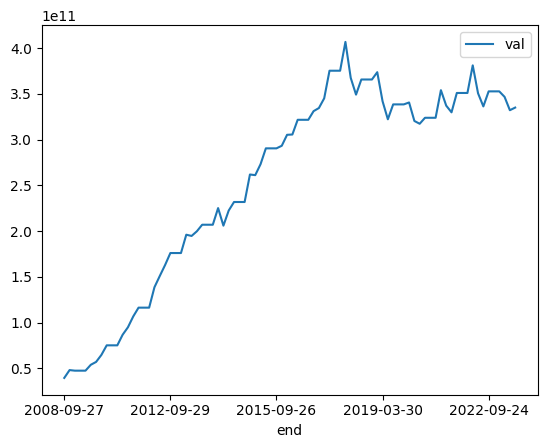

In [81]:
# plot assets and date
assets10Q.plot(x='end', y='val')